In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

In [2]:
df_pima=pd.read_csv('./MiniProject/PimaIndiansDiabetes.csv')
df_pima.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesFunct,Age,Class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [3]:
df_pima.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies      768 non-null int64
Glucose          768 non-null int64
BloodPressure    768 non-null int64
SkinThickness    768 non-null int64
Insulin          768 non-null int64
BMI              768 non-null float64
DiabetesFunct    768 non-null float64
Age              768 non-null int64
Class            768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [19]:
type(df_pima)

pandas.core.frame.DataFrame

In [3]:
df_pima.isnull().sum()

Pregnancies      0
Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
DiabetesFunct    0
Age              0
Class            0
dtype: int64

In [4]:
df_pima.head(20)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesFunct,Age,Class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [3]:
df_pima['Glucose'] = df_pima['Glucose'].replace(0, df_pima['Glucose'].mean())
df_pima['BloodPressure'] = df_pima['BloodPressure'].replace(0, df_pima['Glucose'].mean()) 
df_pima['SkinThickness'] = df_pima['SkinThickness'].replace(0, df_pima['Glucose'].mean()) 
df_pima['Insulin'] = df_pima['Insulin'].replace(0, df_pima['Glucose'].mean())        
df_pima['BMI'] = df_pima['BMI'].replace(0, df_pima['Glucose'].mean()) 



In [6]:
df_pima.head(20)
#np.count_nonzero(df_pima['Insulin'])
#(df_pima.Insulin == 0).sum(axis=0)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesFunct,Age,Class
0,6,148.0,72.000000,35.000000,121.681605,33.600000,0.627,50,1
1,1,85.0,66.000000,29.000000,121.681605,26.600000,0.351,31,0
2,8,183.0,64.000000,121.681605,121.681605,23.300000,0.672,32,1
3,1,89.0,66.000000,23.000000,94.000000,28.100000,0.167,21,0
4,0,137.0,40.000000,35.000000,168.000000,43.100000,2.288,33,1
5,5,116.0,74.000000,121.681605,121.681605,25.600000,0.201,30,0
6,3,78.0,50.000000,32.000000,88.000000,31.000000,0.248,26,1
7,10,115.0,121.681605,121.681605,121.681605,35.300000,0.134,29,0
8,2,197.0,70.000000,45.000000,543.000000,30.500000,0.158,53,1
9,8,125.0,96.000000,121.681605,121.681605,121.681605,0.232,54,1


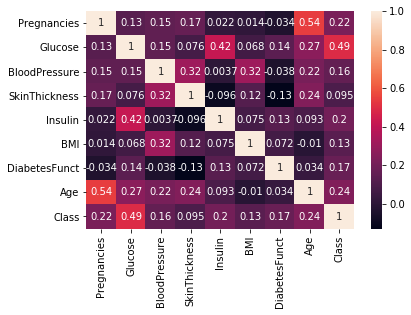

In [7]:
corr = df_pima[df_pima.columns].corr() #corr = correlation
sns.heatmap(corr, annot = True) #sns is used for data visualization using matplotlib

In [4]:
# X = pd.DataFrame(data = df_pima, columns = ["Pregnancies","Glucose","BloodPressure","SkinThickness","Insulin","BMI","DiabetesPedigreeFunction","Age"])
X = pd.DataFrame(data = df_pima, columns = ["Pregnancies","Glucose","SkinThickness","BMI","Age"])
y = pd.DataFrame(data = df_pima, columns = ["Class"])
y

,Class
0,1
1,0
2,1
3,0
4,1
5,0
6,1
7,0
8,1
9,1


In [5]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
X

array([[ 0.63994726,  0.86527574, -0.49860368, -0.01071889,  1.4259954 ],
       [-0.84488505, -1.20598931, -0.63773436, -0.56481576, -0.19067191],
       [ 1.23388019,  2.01597855,  1.51140814, -0.82603285, -0.10558415],
       ...,
       [ 0.3429808 , -0.02240928, -0.77686505, -0.59647844, -0.27575966],
       [-0.84488505,  0.14197684,  1.51140814, -0.28776733,  1.17073215],
       [-0.84488505, -0.94297153, -0.59135747, -0.26402032, -0.87137393]])

In [17]:
type(X)

pandas.core.frame.DataFrame

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=0)

In [7]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(C=0.1,penalty='l2')
model.fit(X_train,y_train)


LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

Logistic Regression :


[1 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 1
 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 1 1 0 0 1 1 1 0 0 0 0 0 0 1
 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 1 0 1 1 0 1 0 1 0 0 0 1 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 1 0 0 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0
 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 1 0 1 0 0 0 0 0] 


Score:  0.7402597402597403 


[[135  22]
 [ 38  36]] 




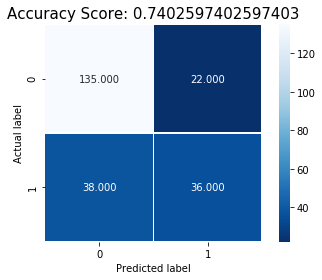

In [26]:
print("Logistic Regression :\n\n")
prediction  = model.predict(X_test)
print(prediction,"\n\n")
score = model.score(X_test,y_test)
print("Score: ",score,"\n\n")
cm = confusion_matrix(y_test,prediction)
print(cm,"\n\n")
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

In [27]:
#naive bayes
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train , y_train)

/home/gibraan/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB(priors=None, var_smoothing=1e-09)

Naive Bayes :


[1 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 1
 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 1 1 0 0 1 1 1 0 1 0 0 0 0 1
 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0
 1 1 0 1 1 0 1 0 1 0 0 0 1 0 0 0 0 1 1 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 1 0 1 1 1 1 0 0 1 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 1 0
 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 1 0 1 0 0 0 0 1] 


Score:  0.7229437229437229 


[[129  28]
 [ 36  38]] 




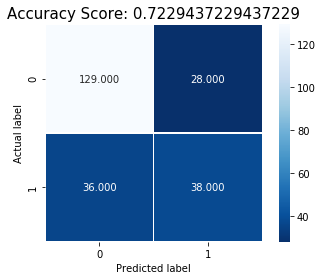

In [28]:
print("Naive Bayes :\n\n")
prediction  = model.predict(X_test)
print(prediction,"\n\n")
score = model.score(X_test,y_test)
print("Score: ",score,"\n\n")
cm = confusion_matrix(y_test,prediction)
print(cm,"\n\n")
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

In [30]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion='gini')
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

Decision Tree :


[1 0 1 1 0 0 0 1 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 1
 0 0 1 0 0 1 1 1 0 0 0 0 1 1 0 1 1 0 0 1 1 0 1 1 0 0 0 1 0 1 0 0 0 1 0 0 1
 1 1 1 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 0 1 0 1 0 0 0
 1 0 0 1 1 0 1 0 0 1 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 1 0 0 0 1 1 1 0 0 0 1 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1
 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0
 0 1 1 0 0 1 0 1 1] 


Score:  0.7272727272727273 


[[126  31]
 [ 32  42]] 




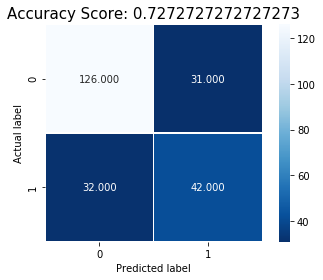

In [31]:
print("Decision Tree :\n\n")
prediction  = model.predict(X_test)
print(prediction,"\n\n")
score = model.score(X_test,y_test)
print("Score: ",score,"\n\n")
cm = confusion_matrix(y_test,prediction)
print(cm,"\n\n")
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

In [32]:
#SVC
from sklearn.svm import SVC
model = SVC(C=0.3,kernel='rbf',gamma=0.43)
model.fit(X_train , y_train)

C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=0.3, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.43, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

SVC :


[1 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1
 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 1
 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 1 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 1 0 0 1 0 1 0 0 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0
 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 1 1 1 1 0 0 0 0 0] 


Score:  0.7575757575757576 


[[139  18]
 [ 38  36]] 




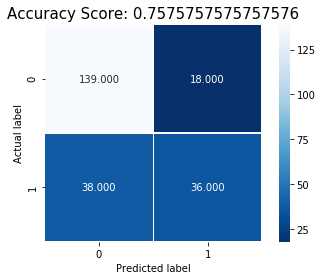

In [33]:
print("SVC :\n\n")
prediction  = model.predict(X_test)
print(prediction,"\n\n")
score = model.score(X_test,y_test)
print("Score: ",score,"\n\n")
cm = confusion_matrix(y_test,prediction)
print(cm,"\n\n")
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

In [34]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=13)
model.fit(X_train , y_train)

C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=13, p=2,
           weights='uniform')

KNN :


[1 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 1
 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 1 1 0 0 1 1 1 0 1 0 0 0 0 1
 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0
 1 1 0 1 1 0 1 0 1 0 0 0 1 0 0 0 0 1 1 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 1 0 1 1 1 1 0 0 1 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 1 0
 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 1 0 1 0 0 0 0 1] 


Score:  0.7229437229437229 


[[129  28]
 [ 36  38]] 




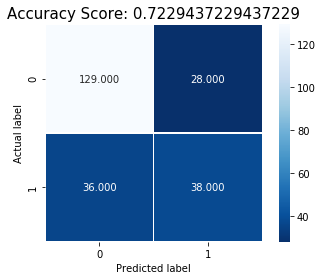

In [29]:
print("KNN :\n\n")
prediction  = model.predict(X_test)
print(prediction,"\n\n")
score = model.score(X_test,y_test)
print("Score: ",score,"\n\n")
cm = confusion_matrix(y_test,prediction)
print(cm,"\n\n")
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);